In [1]:
from scipy.stats import friedmanchisquare
import matplotlib.pyplot as plt
from matplotlib import colors as color
import seaborn as sns
import matplotlib.patches as pat
import pandas as pd
import numpy as np 
import os

In [2]:
def friedman(dat):
    data1 = np.array(dat['Word2vec'])
    data2 = np.array(dat['BOW-TFIDF'])
    data3 = np.array(dat['Simple encoder-decoder'])
    data4 = np.array(dat['Google universal encoder'])
    data5 = np.array(dat['Skip-Thoughts'])
    data6 = np.array(dat['InferSent'])
    # compare samples
    stat, p = friedmanchisquare(data1, data2, data3, data4, data5, data6)
    print('Friedman-chi-square=%.3f' % (stat))
    print('p=%.3f' % (p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('All algorithms have same performance(fail to reject)')
    else:
        print('All algorithms do not have same performance and at least one of them behaves differently. (reject)')

In [3]:
def ran_mean(dat):
    dat_1 = dat.copy()
    #dat_1.loc['mean'] = dat_1.mean()
    dat_2 = dat_1.rank(1, ascending=True, method='first')
    dat_2.loc['mean'] = dat_2.mean()
    dat_1.loc['mean'] = dat_1.mean()
    siz = [16892, 1412, 159, 566, 411, 1311, 145, 5750, 2461, 1598, 728, 2387, 266, 19118, 'Average']
    dat_1['si'] = siz
    dat_1 = dat_1.round(2)
    dat_2 = dat_2.round(2)
    dat_1 = dat_1.astype(str)
    dat_2 = dat_2.astype(str)
    dat_3 = pd.DataFrame()
    dat_3['Datasets(Size)'] = dat_1['MSE']+' '+'('+dat_1['si']+')'
    dat_3['word_vec'] = dat_1['Word2vec']+' '+'('+dat_2['Word2vec']+')'
    dat_3['bow_tfidf'] = dat_1['BOW-TFIDF']+' '+'('+dat_2['BOW-TFIDF']+')'
    dat_3['seq2seq'] = dat_1['Simple encoder-decoder']+' '+'('+dat_2['Simple encoder-decoder']+')'
    dat_3['google_enc'] = dat_1['Google universal encoder']+' '+'('+dat_2['Google universal encoder']+')'
    dat_3['skip_thoughts'] = dat_1['Skip-Thoughts']+' '+'('+dat_2['Skip-Thoughts']+')'
    dat_3['infer_sent'] = dat_1['InferSent']+' '+'('+dat_2['InferSent']+')'
    dat_3 = dat_3[['Datasets(Size)','word_vec','bow_tfidf','seq2seq','google_enc','skip_thoughts','infer_sent']]
    return dat_3

In [4]:
fname = 'final_mse.csv'
filename = os.path.join('/Users/rithika/Documents/247ai/summer-internship/RF_results', fname)
if os.path.isfile(filename):
    dat = pd.read_csv(filename)
else:
    print("no such file exists at this time")

In [5]:
dat

,MSE,Word2vec,BOW-TFIDF,Simple encoder-decoder,Google universal encoder,Skip-Thoughts,InferSent
0,Digitonomy,2.990,2.970,2.940,3.000,3.01,2.940
1,HP,1903507.860,1915205.890,1904510.800,1906074.520,1900998.68,1905618.090
2,Blackhawk Network,584517.180,584224.760,584115.370,584201.870,584085.26,584692.410
3,HPE,539.510,464.590,682.570,526.640,1900.91,658.040
4,Samsung,20022.530,20404.080,19890.950,20043.520,20402.21,20009.530
5,Serenata Flowers,170.400,175.560,176.840,173.010,187.27,170.320
6,Snooze,5986.130,5774.050,6174.720,5917.380,6445.64,6413.040
7,Subaru,47.710,46.700,47.640,44.740,50.68,45.440
8,The Holiday Place,233.460,239.650,243.840,236.730,246.23,234.460
9,Zalora,11.630,11.640,11.460,11.580,11.64,11.590


In [6]:
first_plot = pd.melt(dat, id_vars="MSE", var_name="models", value_name="mean-squared_error")

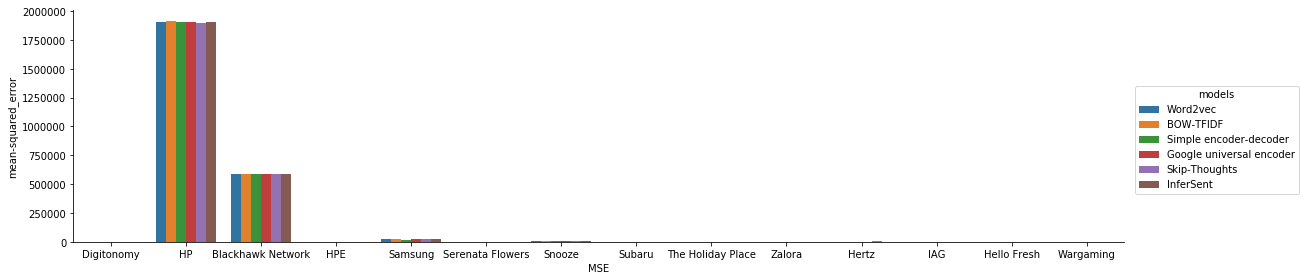

In [7]:
%matplotlib inline
sns.factorplot(x='MSE', y='mean-squared_error', hue='models', data=first_plot, kind='bar', aspect=400/100)
plt.savefig('/Users/rithika/Documents/247ai/summer-internship/plots/raw_mse.png')
plt.show()

In [8]:
rank_dat = dat.copy()
rank_dat = rank_dat.rank(1, ascending=True, method='first')

In [9]:
r_dat = pd.concat([dat['MSE'],rank_dat],axis=1).sort_index(axis=1)

In [10]:
rank_plot = pd.melt(r_dat, id_vars="MSE", var_name="model", value_name="ranks")

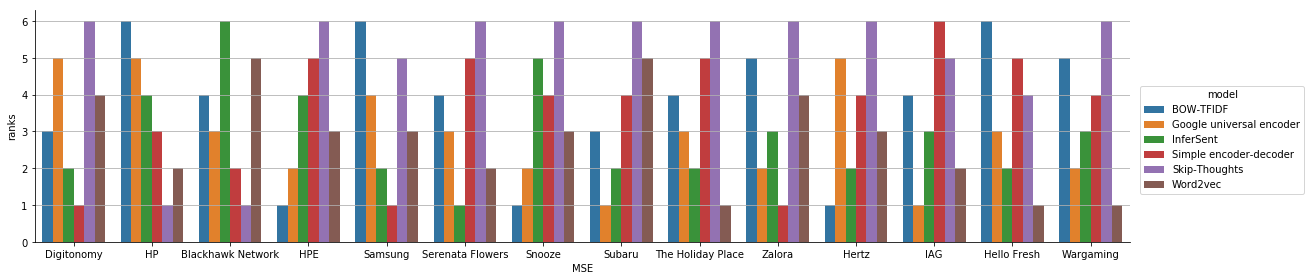

In [11]:
%matplotlib inline
sns.factorplot(x='MSE', y='ranks', hue='model', data=rank_plot, kind='bar', aspect=400/100)
plt.grid(axis='y')
plt.savefig('/Users/rithika/Documents/247ai/summer-internship/plots/ranked_mse.png')
plt.show()

In [12]:
m_dat = rank_dat.copy()
m_dat.loc['mean'] = m_dat.mean()

In [13]:
pl = m_dat.loc['mean'].values.tolist()

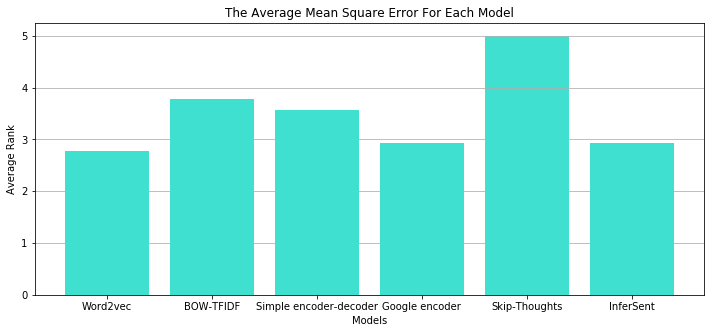

In [14]:
plt.figure(figsize=(12,5))
x = [1,2,3,4,5,6]
plt.bar(x,pl,color='turquoise')#, height=10)
plt.xticks([1,2,3,4,5,6],['Word2vec','BOW-TFIDF','Simple encoder-decoder','Google encoder','Skip-Thoughts','InferSent'])
plt.title('The Average Mean Square Error For Each Model')
plt.xlabel('Models')
plt.ylabel('Average Rank')
plt.grid(axis='y')
plt.savefig('/Users/rithika/Documents/247ai/summer-internship/plots/MSE.png')
plt.show()

In [15]:
m_dat

,Word2vec,BOW-TFIDF,Simple encoder-decoder,Google universal encoder,Skip-Thoughts,InferSent
0,4.000000,3.000000,1.000000,5.000000,6.0,2.000000
1,2.000000,6.000000,3.000000,5.000000,1.0,4.000000
2,5.000000,4.000000,2.000000,3.000000,1.0,6.000000
3,3.000000,1.000000,5.000000,2.000000,6.0,4.000000
4,3.000000,6.000000,1.000000,4.000000,5.0,2.000000
5,2.000000,4.000000,5.000000,3.000000,6.0,1.000000
6,3.000000,1.000000,4.000000,2.000000,6.0,5.000000
7,5.000000,3.000000,4.000000,1.000000,6.0,2.000000
8,1.000000,4.000000,5.000000,3.000000,6.0,2.000000
9,4.000000,5.000000,1.000000,2.000000,6.0,3.000000


In [16]:
friedman(dat)

Friedman-chi-square=13.922
p=0.016
All algorithms do not have same performance and at least one of them behaves differently. (reject)


In [17]:
visual = ran_mean(dat)

In [18]:
visual

,Datasets(Size),word_vec,bow_tfidf,seq2seq,google_enc,skip_thoughts,infer_sent
0,Digitonomy (16892),2.99 (4.0),2.97 (3.0),2.94 (1.0),3.0 (5.0),3.01 (6.0),2.94 (2.0)
1,HP (1412),1903507.86 (2.0),1915205.89 (6.0),1904510.8 (3.0),1906074.52 (5.0),1900998.68 (1.0),1905618.09 (4.0)
2,Blackhawk Network (159),584517.18 (5.0),584224.76 (4.0),584115.37 (2.0),584201.87 (3.0),584085.26 (1.0),584692.41 (6.0)
3,HPE (566),539.51 (3.0),464.59 (1.0),682.57 (5.0),526.64 (2.0),1900.91 (6.0),658.04 (4.0)
4,Samsung (411),20022.53 (3.0),20404.08 (6.0),19890.95 (1.0),20043.52 (4.0),20402.21 (5.0),20009.53 (2.0)
5,Serenata Flowers (1311),170.4 (2.0),175.56 (4.0),176.84 (5.0),173.01 (3.0),187.27 (6.0),170.32 (1.0)
6,Snooze (145),5986.13 (3.0),5774.05 (1.0),6174.72 (4.0),5917.38 (2.0),6445.64 (6.0),6413.04 (5.0)
7,Subaru (5750),47.71 (5.0),46.7 (3.0),47.64 (4.0),44.74 (1.0),50.68 (6.0),45.44 (2.0)
8,The Holiday Place (2461),233.46 (1.0),239.65 (4.0),243.84 (5.0),236.73 (3.0),246.23 (6.0),234.46 (2.0)
9,Zalora (1598),11.63 (4.0),11.64 (5.0),11.46 (1.0),11.58 (2.0),11.64 (6.0),11.59 (3.0)
